In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import pandas as pd
from glob import glob
import re
import os
from functools import reduce
import numbers
from random import shuffle
from tqdm import tqdm
import json
import matplotlib.ticker as mtick

In [2]:
oldNewStandard = pd.read_csv('oldNewStandard.txt', sep='\t', index_col=0, names = ['New', 'Old']).reset_index(drop = True)
oldNewStandard.head(7)

,New,Old
0,90,60
1,75,54
2,60,48
3,50,43
4,45,40
5,40,38
6,36,36


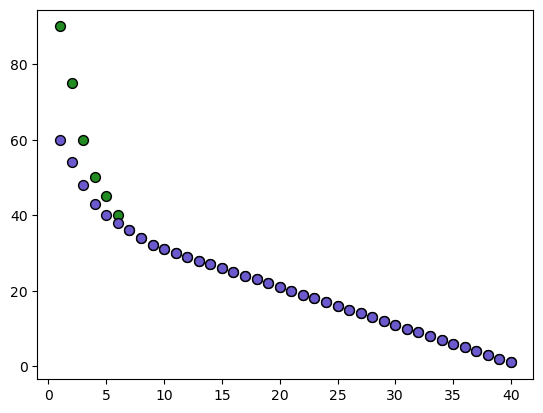

In [4]:
fig, ax = plt.subplots(1, 1)
ax.scatter(range(1, len(oldNewStandard) + 1),oldNewStandard['New'], label = 'Nuovo sistema di punteggi',\
            color = 'forestgreen', edgecolor = 'black', s = 50, zorder = 2)
ax.scatter(range(1, len(oldNewStandard) + 1), oldNewStandard['Old'], label = 'Vecchio sistema di punteggi',\
            color = 'slateblue', edgecolor = 'black', s = 50, zorder = 2)
ax.scatter(x = 7, y =36, color = 'firebrick')

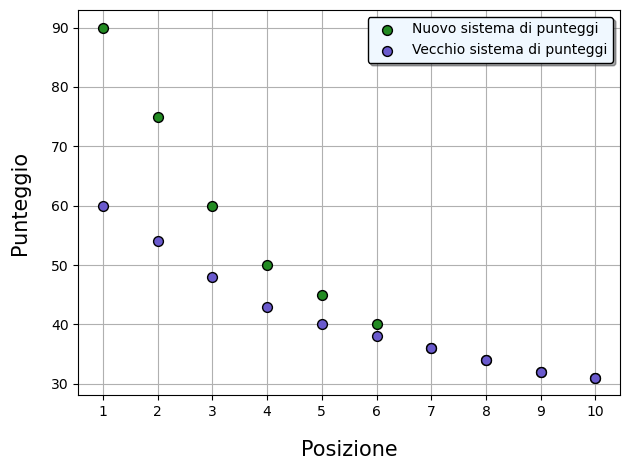

In [4]:
fig, ax = plt.subplots(1, 1)
ax.scatter(range(1, 11),np.array(oldNewStandard['New'][:10]), label = 'Nuovo sistema di punteggi',\
            color = 'forestgreen', edgecolor = 'black', s = 50, zorder = 2)
ax.scatter(range(1, 11), np.array(oldNewStandard['Old'][:10]), label = 'Vecchio sistema di punteggi',\
            color = 'slateblue', edgecolor = 'black', s = 50, zorder = 2)
ax.legend(facecolor = 'aliceblue', edgecolor = 'black', shadow = True)
ax.set_ylabel('Punteggio', fontsize = 15, labelpad = 15)
ax.set_xlabel('Posizione', fontsize = 15, labelpad = 15)
ax.set_xticks(range(1, 11))
ax.grid(zorder = 1)
#ax.scatter(x = 7, y =36, color = 'firebrick')
fig.tight_layout()
fig.savefig('rankingPoints.png', dpi = 300)

In [5]:
prizeMoney = pd.read_csv('prizeMoney.txt', sep='\t', index_col=0, names = ['Prize Money']).reset_index(drop = True)

prizeMoney.head(7)

,Prize Money
0,15000
1,12000
2,9000
3,7000
4,6000
5,5000
6,4500


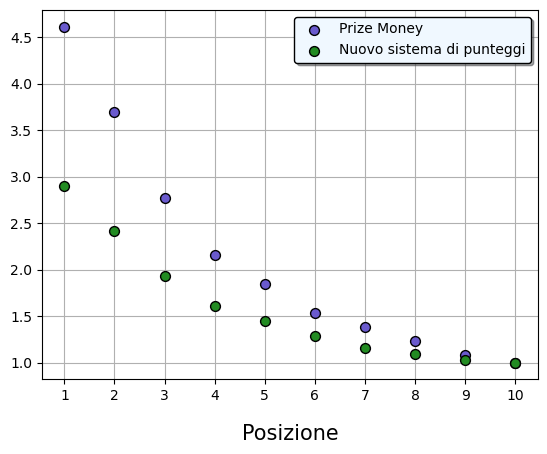

In [6]:
fig, ax = plt.subplots(1, 1)
ax.scatter(range(1, 11), prizeMoney['Prize Money'][:10]/prizeMoney['Prize Money'][9], label = 'Prize Money', color = 'slateblue',\
            edgecolor = 'black', s = 50, zorder = 2)
ax.scatter(range(1, 11), np.array(oldNewStandard['New'])[:10]/np.array(oldNewStandard['New'])[9],\
            label = 'Nuovo sistema di punteggi', color = 'forestgreen', edgecolor = 'black', s = 50, zorder = 2)
ax.legend(facecolor = 'aliceblue', edgecolor = 'black', shadow = True)
ax.set_xlabel('Posizione', fontsize = 15, labelpad = 15)
ax.set_xticks(range(1, 11))
ax.grid(zorder = 1)
plt.show()

In [7]:
def geometricScoring(x, p):
    return p**(40 - x)/np.max(p**(40 - x))  

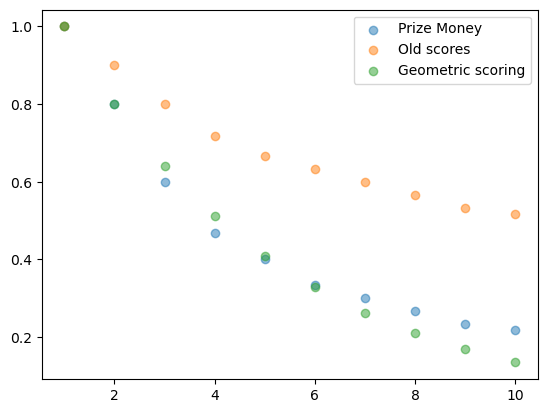

In [8]:
fig, ax = plt.subplots(1, 1)
ax.scatter(range(1, 11), prizeMoney['Prize Money'][:10]/np.max(prizeMoney['Prize Money']), label = 'Prize Money', alpha =  0.5)
ax.scatter(range(1, 11), np.array(oldNewStandard['Old'])[:10]/np.max(np.array(oldNewStandard['Old'])), label = 'Old scores', alpha =  0.5)
ax.scatter(range(1, 11), geometricScoring(np.arange(1, 11), 1.25), label = 'Geometric scoring', alpha =  0.5)
plt.legend()
plt.show()

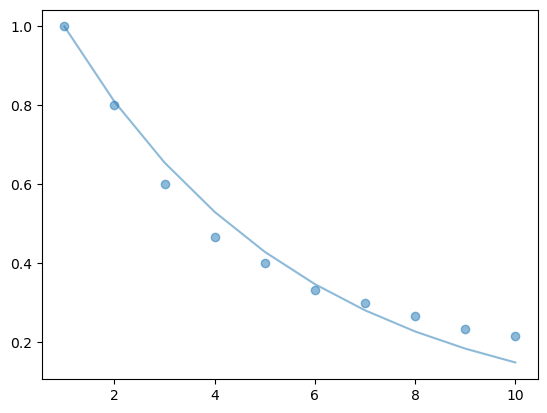

In [9]:
popt, pcov = curve_fit(geometricScoring, np.arange(1, 11), prizeMoney['Prize Money'][:10]/np.max(prizeMoney['Prize Money']))
fig, ax = plt.subplots(1, 1)
ax.scatter(range(1, 11), prizeMoney['Prize Money'][:10]/np.max(prizeMoney['Prize Money']), label = 'Prize Money', alpha =  0.5)
ax.plot(np.arange(1, 11), geometricScoring(np.arange(1, 11), *popt), label = 'Geometric scoring', alpha =  0.5)

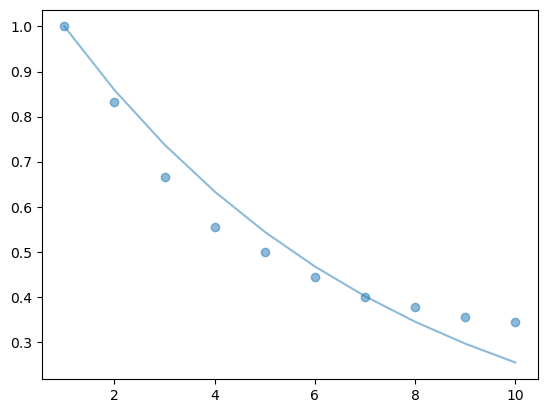

In [10]:
# Same for the new scoring system

poptNew, pcov = curve_fit(geometricScoring, np.arange(1, 11), np.array(oldNewStandard['New'])[:10]/np.max(np.array(oldNewStandard['New'])))
fig, ax = plt.subplots(1, 1)
ax.scatter(range(1, 11), np.array(oldNewStandard['New'])[:10]/np.max(np.array(oldNewStandard['New'])), label = 'New scores', alpha =  0.5)
ax.plot(np.arange(1, 11), geometricScoring(np.arange(1, 11), *poptNew), label = 'Geometric scoring', alpha =  0.5)

In [11]:
geometricScoring(np.arange(1, 11), 1.145)*100

array([100.        ,  87.33624454,  76.27619611,  66.61676516,
        58.18058092,  50.81273443,  44.377934  ,  38.75802096,
        33.84979997,  29.56314408])

In [12]:
geometricScoring(np.arange(1, 11), 1.23)*100

array([100.        ,  81.30081301,  66.09822196,  53.73839184,
        43.68974946,  35.52012151,  28.87814757,  23.47816876,
        19.08794208,  15.5186521 ])

In [13]:
pathRankings = '../../data/endSeasonRanking/'
pathResults = '../../data/biathlon_data/'

In [14]:
finalRankings = {'men': glob(pathRankings + 'men/*'), 'women' : glob(pathRankings + 'women/*')}
pd.read_csv(glob('../../data/endSeasonRanking/men/*')[0], sep = '\t').head()

,No,Family Name,Given Name,Nation,Races,World Cup\nRank,Rank\n(avg),Points\n(avg),Wins,2nd,...,Podiums,Top5s,Top10s,Top20s,Top30s,Top40s,>40,LAP,DNF,DSQ
0,1,Fillon Maillet,Quentin,FRA,26,1.0,5.3,39.0,10,5,...,16,18,23,25,25,26,0,0,0,0
1,2,Boe,Johannes Thingnes,NOR,17,13.0,9.6,25.9,3,1,...,6,10,12,14,17,17,0,0,0,0
2,3,Laegreid,Sturla Holm,NOR,23,2.0,9.5,30.7,2,2,...,7,10,17,19,22,23,0,0,0,0
3,4,Samuelsson,Sebastian,SWE,24,3.0,10.8,29.9,2,2,...,6,9,14,21,23,24,0,0,0,0
4,5,Christiansen,Vetle Sjaastad,NOR,24,4.0,10.7,29.5,2,1,...,5,10,13,22,23,24,0,0,0,0


In [15]:
allSeasons = []
for ranking in finalRankings['men']:
    season = re.findall('[0-9]+-[0-9]+', ranking)[0]
    allSeasons.append(season)
allSeasons = np.unique(np.array(allSeasons))

In [16]:
allFiles = {season: {'men':[], 'women':[]} for season in allSeasons}
for root, dirs, files in os.walk(pathResults, topdown = True):
    for name in files:
        if 'results' in name:
            season = re.findall('[0-9]+-[0-9]+', root)[0]
            gender = re.findall('men|women', root)[0]
            if season != '2022-2023':
                allFiles[season][gender].append(os.path.join(root, name))

In [17]:
dictNew = dict(zip(list(range(1, 151)) + [np.nan] + [np.inf], list(oldNewStandard['New']) + [0]*112))
dictOld = dict(zip(list(range(1, 151)) + [np.nan] + [np.inf], list(oldNewStandard['Old']) + [0]*112))

In [18]:
def catch(x):
    try:
        int(x)
        return True 
    except ValueError:
        return False

In [19]:
def swapProbability(x):
    return 1 / (1 + np.exp(x))

In [23]:
# Set a random seed to ensure reproducibility


def sampleRaceGenetically(season, gender, dictRanking):
    '''
    Function to simulate the outcome of a race in a genetic way.
    We sample the outcome of a race and sample 3 other races. Using a sim0id(-x), with x the mean of ranking in the 4 sampled races,
    we compute the probability of swapping the ranking of the 2 athletes. 

    Arguments,
    season: the season to sample the race from, a string qith the format 'YYYZ-YYY(Z+1)'
    gender: a string, either \'men\' or \'women\'
    dictRanking: a dictionary with the ranking of the athletes in the season, with the format {rank: score}
    '''
    # Randomly select 4 races from a dictionary of race files
    sampleRaces = np.random.choice(allFiles[season][gender], 4) 

    # Select the first race and read the ranking data into a pandas dataframe
    rankingRace = sampleRaces[0]
    #print(rankingRace)
    dfSampleRace = pd.read_csv(rankingRace, sep = '\t')
    dfSampleRace['fullName'] = dfSampleRace['Given Name'] + ' ' + dfSampleRace['Family\xa0Name']

     # Read the ranking data for the remaining 3 races into pandas dataframes
    dfOtherRaces = [pd.read_csv(sampleRaces[i], sep = '\t') for i in range(0, 4)]
    for df in dfOtherRaces:
        df['fullName'] = df['Given Name'] + ' ' + df['Family\xa0Name']

    # Read the final rankings data into a pandas dataframe
    fileRanking = list(filter(lambda x: season in x, finalRankings[gender]))[0]
    dfRanking = pd.read_csv(fileRanking, sep = '\t')
    dfRanking['fullName'] = dfRanking['Given Name'] + ' ' + dfRanking['Family\xa0Name']
    dfRanking = dfRanking.sort_values(by = 'World Cup\nRank')
    ranking = np.array(dfRanking['World Cup\nRank'])
    rankingFiltered = ranking[~np.isnan(ranking)]
    rankingFiltered = rankingFiltered.astype(int)
    fullName = np.array(dfRanking['fullName'])
    fullNameFiltered = fullName[~np.isnan(ranking)]

    # Create a dictionary that maps athlete names to their final ranking
    rankingDict = dict(zip(fullNameFiltered, rankingFiltered))

    # Initialize arrays and dictionaries for storing results
    #finalSample = np.zeros(2*len(rankingDict.keys()))
    resultsDict = dict(zip(fullNameFiltered, np.zeros(len(fullNameFiltered))))
    meanDict = dict(zip(fullNameFiltered, np.zeros(len(fullNameFiltered))))
    # Compute the mean ranking for each athlete across the 4 races
    for name in list(rankingDict.keys()):
        rank = dfSampleRace[dfSampleRace['fullName'] == name]['Rank']
        if len(rank) == 0: rank = np.inf
        else:
            try: 
                #print(rank)
                rank = int(rank)
            except ValueError:
                rank = np.inf
        #finalSample[rankingDict[name] - 1] = rank
        resultsDict[name] = rank

        for dfRace in dfOtherRaces:
            rank = dfRace[dfRace['fullName'] == name]['Rank']
            if len(rank) == 0: rank = np.inf
            else:
                try:
                    rank = int(rank)
                except ValueError:
                    rank = np.inf
            meanDict[name] += rank/4
            
    sortedMean = dict(sorted(meanDict.items(), key = lambda x: x[1]))
    #print(resultsDict)
    sortedResults = dict(sorted(resultsDict.items(), key = lambda x: x[1]))
    #print(sortedResults)
    #print(sortedResults)
    swapBool = np.zeros(len(sortedMean))
    finalResult = sortedResults.copy()
    #print('finalResult 1 ->', finalResult)
    flag = True

    # Compute swap probability and swap rankings if needed
    for i in range(len(meanDict) - 1):
        probSwap = swapProbability(meanDict[list(sortedResults.keys())[i + 1]] - meanDict[list(sortedResults.keys())[i]])
        if np.random.rand() < probSwap and flag:
            swapBool[i] = 1 
            flag = False
        else:
            flag = True
    swapBool = swapBool.astype(bool)
    for i in range(len(swapBool) - 1):
        if swapBool[i]:
            finalResult[list(sortedResults.keys())[i]], finalResult[list(sortedResults.keys())[i + 1]] = \
                finalResult[list(sortedResults.keys())[i + 1]], finalResult[list(sortedResults.keys())[i]]
    #print(dictRanking, finalResult[name])
    finalPoints = {name : dictRanking[finalResult[name]] for name in finalResult.keys()}
    #print('finalResult 2 ->', finalResult)
    return finalPoints

    

In [24]:
'''
simResults = {season:{'Old':{'men':{}, 'women':{}}, 'New':{'men':{}, 'women':{}}} for season in allSeasons}
for season in allSeasons:
    for ranking in ['Old', 'New']:
        for gender in ['men', 'women']:
            fileRanking = list(filter(lambda x: season in x, finalRankings[gender]))[0]
            dfRanking = pd.read_csv(fileRanking, sep = '\t')
            dfRanking['fullName'] = dfRanking['Given Name'] + ' ' + dfRanking['Family\xa0Name']
            dfRanking = dfRanking.sort_values(by = 'World Cup\nRank')
            simResults[season][ranking][gender] = {name : [] for name in list(dfRanking['fullName'])} 
'''            

"\nsimResults = {season:{'Old':{'men':{}, 'women':{}}, 'New':{'men':{}, 'women':{}}} for season in allSeasons}\nfor season in allSeasons:\n    for ranking in ['Old', 'New']:\n        for gender in ['men', 'women']:\n            fileRanking = list(filter(lambda x: season in x, finalRankings[gender]))[0]\n            dfRanking = pd.read_csv(fileRanking, sep = '\t')\n            dfRanking['fullName'] = dfRanking['Given Name'] + ' ' + dfRanking['Family\xa0Name']\n            dfRanking = dfRanking.sort_values(by = 'World Cup\nRank')\n            simResults[season][ranking][gender] = {name : [] for name in list(dfRanking['fullName'])} \n"

In [25]:
import warnings
warnings.filterwarnings("ignore")

In [108]:
numIteration = 250
numRaces = 24

baseMetricsDictOld = {'winnerOld':[], 'winsOld':[], 'raceDedicedBeforeOld':[], 'seasonOld':[]}
baseMetricsDictNew = {'winnerNew':[], 'winsNew':[], 'raceDedicedBeforeNew':[], 'seasonNew':[]}


resultsMetrics = {'Old':baseMetricsDictOld, 'New': baseMetricsDictNew}
for j in tqdm(range(numIteration)):
    simResults = {season:{'Old':{'men':{}, 'women':{}}, 'New':{'men':{}, 'women':{}}} for season in allSeasons}
    for season in allSeasons:
        for ranking in ['Old', 'New']:
            for gender in ['men', 'women']:
                fileRanking = list(filter(lambda x: season in x, finalRankings[gender]))[0]
                dfRanking = pd.read_csv(fileRanking, sep = '\t')
                dfRanking['fullName'] = dfRanking['Given Name'] + ' ' + dfRanking['Family\xa0Name']
                dfRanking = dfRanking.sort_values(by = 'World Cup\nRank')
                simResults[season][ranking][gender] = {name : [] for name in list(dfRanking['fullName'])} 
    for i in range(numRaces):
        for season in allSeasons:
            for ranking in ['Old', 'New']:
                for gender in ['men', 'women']:
                    if ranking == 'Old':
                        dictRanking = dictOld
                        pointsFirst = 60
                    else:
                        dictRanking = dictNew
                        pointsFirst = 90
                    fileRanking = list(filter(lambda x: season in x, finalRankings[gender]))[0]
                    dfRanking = pd.read_csv(fileRanking, sep = '\t')
                    dfRanking['fullName'] = dfRanking['Given Name'] + ' ' + dfRanking['Family\xa0Name']
                    racePoints = sampleRaceGenetically(season, gender, dictRanking)
                    #
                    # if season == '2019-2020' and gender == 'men':
                        #print('racePoints ->', racePoints['Martin Fourcade'], '\n')
                    for name in list(dfRanking['fullName']):
                        if name in list(racePoints.keys()):
                            simResults[season][ranking][gender][name].append(racePoints[name])
                        else:
                            #if season == '2019-2020' and name == 'Martin Fourcade':
                                #print(racePoints, dictRanking)
                            simResults[season][ranking][gender][name].append(0)

                    if i == range(numRaces)[-1]:
                        dfMetrics = pd.DataFrame(simResults[season][ranking][gender])
                        winner = dfMetrics.sum(axis = 0).sort_values(ascending=False).index[0]
                        wins = (dfMetrics == pointsFirst).sum(axis = 0)[winner]
                        raceIdx = np.where((pd.DataFrame(np.array(dfMetrics.cumsum(axis = 0)) - np.array(dfMetrics.cumsum(axis = 0)[winner])[:,None],\
                  columns = dfMetrics.columns) > -np.array((24 - np.array(range(24)))*pointsFirst).reshape(24, 1)).sum(axis = 1)\
                    == 1)[0]
                        if len(raceIdx) == 0:
                            raceDedicedBefore = 0
                        else:
                            raceDedicedBefore = 23 - raceIdx[0]
                        resultsMetrics[ranking][f'winner{ranking}'].append(winner)
                        resultsMetrics[ranking][f'wins{ranking}'].append(str(wins))
                        resultsMetrics[ranking][f'raceDedicedBefore{ranking}'].append(str(raceDedicedBefore))
                        resultsMetrics[ranking][f'season{ranking}'].append(season)

    print('Completed iteration ' + str(j + 1) + ' of ' + str(numIteration))
                    
        
                

  0%|          | 1/250 [02:27<10:11:42, 147.40s/it]

Completed iteration 1 of 250


  1%|          | 2/250 [04:39<9:32:37, 138.54s/it] 

Completed iteration 2 of 250


  1%|          | 3/250 [06:51<9:18:17, 135.62s/it]

Completed iteration 3 of 250


  2%|▏         | 4/250 [09:02<9:07:44, 133.59s/it]

Completed iteration 4 of 250


  2%|▏         | 5/250 [11:12<9:00:37, 132.40s/it]

Completed iteration 5 of 250


  2%|▏         | 6/250 [13:22<8:55:17, 131.63s/it]

Completed iteration 6 of 250


  3%|▎         | 7/250 [15:32<8:50:41, 131.03s/it]

Completed iteration 7 of 250


  3%|▎         | 8/250 [17:44<8:49:02, 131.17s/it]

Completed iteration 8 of 250


  4%|▎         | 9/250 [19:55<8:46:38, 131.11s/it]

Completed iteration 9 of 250


  4%|▍         | 10/250 [22:04<8:42:59, 130.75s/it]

Completed iteration 10 of 250


  4%|▍         | 11/250 [24:14<8:39:43, 130.48s/it]

Completed iteration 11 of 250


  5%|▍         | 12/250 [26:24<8:36:35, 130.23s/it]

Completed iteration 12 of 250


  5%|▌         | 13/250 [28:35<8:34:47, 130.33s/it]

Completed iteration 13 of 250


  6%|▌         | 14/250 [30:43<8:29:54, 129.64s/it]

Completed iteration 14 of 250


  6%|▌         | 15/250 [32:54<8:30:16, 130.28s/it]

Completed iteration 15 of 250


  6%|▋         | 16/250 [35:07<8:30:36, 130.93s/it]

Completed iteration 16 of 250


  7%|▋         | 17/250 [37:19<8:29:54, 131.31s/it]

Completed iteration 17 of 250


  7%|▋         | 18/250 [39:31<8:28:57, 131.63s/it]

Completed iteration 18 of 250


  8%|▊         | 19/250 [41:42<8:26:06, 131.46s/it]

Completed iteration 19 of 250


  8%|▊         | 20/250 [43:52<8:21:38, 130.86s/it]

Completed iteration 20 of 250


  8%|▊         | 21/250 [46:02<8:18:09, 130.52s/it]

Completed iteration 21 of 250


  9%|▉         | 22/250 [48:12<8:15:28, 130.39s/it]

Completed iteration 22 of 250


  9%|▉         | 23/250 [50:21<8:12:34, 130.20s/it]

Completed iteration 23 of 250


 10%|▉         | 24/250 [52:31<8:09:41, 130.00s/it]

Completed iteration 24 of 250


 10%|█         | 25/250 [54:39<8:05:15, 129.40s/it]

Completed iteration 25 of 250


 10%|█         | 26/250 [56:52<8:07:03, 130.46s/it]

Completed iteration 26 of 250


 11%|█         | 27/250 [59:05<8:07:36, 131.20s/it]

Completed iteration 27 of 250


 11%|█         | 28/250 [1:01:15<8:04:18, 130.89s/it]

Completed iteration 28 of 250


 12%|█▏        | 29/250 [1:03:24<7:59:54, 130.29s/it]

Completed iteration 29 of 250


 12%|█▏        | 30/250 [1:05:33<7:56:46, 130.03s/it]

Completed iteration 30 of 250


 12%|█▏        | 31/250 [1:07:42<7:53:06, 129.62s/it]

Completed iteration 31 of 250


 13%|█▎        | 32/250 [1:09:53<7:52:19, 130.00s/it]

Completed iteration 32 of 250


 13%|█▎        | 33/250 [1:12:05<7:52:21, 130.61s/it]

Completed iteration 33 of 250


 14%|█▎        | 34/250 [1:14:15<7:49:42, 130.48s/it]

Completed iteration 34 of 250


 14%|█▍        | 35/250 [1:16:27<7:49:18, 130.97s/it]

Completed iteration 35 of 250


 14%|█▍        | 36/250 [1:18:40<7:48:36, 131.38s/it]

Completed iteration 36 of 250


 15%|█▍        | 37/250 [1:20:51<7:46:21, 131.37s/it]

Completed iteration 37 of 250


 15%|█▌        | 38/250 [1:23:03<7:45:03, 131.62s/it]

Completed iteration 38 of 250


 16%|█▌        | 39/250 [1:25:15<7:42:50, 131.61s/it]

Completed iteration 39 of 250


 16%|█▌        | 40/250 [1:27:27<7:41:13, 131.78s/it]

Completed iteration 40 of 250


 16%|█▋        | 41/250 [1:29:39<7:39:33, 131.93s/it]

Completed iteration 41 of 250


 17%|█▋        | 42/250 [1:31:51<7:37:25, 131.95s/it]

Completed iteration 42 of 250


 17%|█▋        | 43/250 [1:34:02<7:34:35, 131.76s/it]

Completed iteration 43 of 250


 18%|█▊        | 44/250 [1:36:12<7:29:38, 130.96s/it]

Completed iteration 44 of 250


 18%|█▊        | 45/250 [1:38:20<7:25:14, 130.31s/it]

Completed iteration 45 of 250


 18%|█▊        | 46/250 [1:40:28<7:20:14, 129.48s/it]

Completed iteration 46 of 250


 19%|█▉        | 47/250 [1:42:37<7:18:02, 129.47s/it]

Completed iteration 47 of 250


 19%|█▉        | 48/250 [1:44:47<7:15:56, 129.49s/it]

Completed iteration 48 of 250


 20%|█▉        | 49/250 [1:46:57<7:14:09, 129.60s/it]

Completed iteration 49 of 250


 20%|██        | 50/250 [1:49:05<7:10:18, 129.09s/it]

Completed iteration 50 of 250


 20%|██        | 51/250 [1:51:14<7:08:40, 129.25s/it]

Completed iteration 51 of 250


 21%|██        | 52/250 [1:53:24<7:07:01, 129.40s/it]

Completed iteration 52 of 250


 21%|██        | 53/250 [1:55:34<7:05:17, 129.53s/it]

Completed iteration 53 of 250


 22%|██▏       | 54/250 [1:57:43<7:02:59, 129.49s/it]

Completed iteration 54 of 250


 22%|██▏       | 55/250 [1:59:52<6:59:49, 129.18s/it]

Completed iteration 55 of 250


 22%|██▏       | 56/250 [2:02:01<6:58:16, 129.36s/it]

Completed iteration 56 of 250


 23%|██▎       | 57/250 [2:04:11<6:56:23, 129.45s/it]

Completed iteration 57 of 250


 23%|██▎       | 58/250 [2:06:21<6:54:10, 129.43s/it]

Completed iteration 58 of 250


 24%|██▎       | 59/250 [2:08:30<6:52:11, 129.48s/it]

Completed iteration 59 of 250


 24%|██▍       | 60/250 [2:10:40<6:50:09, 129.53s/it]

Completed iteration 60 of 250


 24%|██▍       | 61/250 [2:12:48<6:46:47, 129.14s/it]

Completed iteration 61 of 250


 25%|██▍       | 62/250 [2:14:57<6:44:51, 129.21s/it]

Completed iteration 62 of 250


 25%|██▌       | 63/250 [2:17:07<6:42:42, 129.21s/it]

Completed iteration 63 of 250


 26%|██▌       | 64/250 [2:19:16<6:40:47, 129.29s/it]

Completed iteration 64 of 250


 26%|██▌       | 65/250 [2:21:25<6:38:34, 129.27s/it]

Completed iteration 65 of 250


 26%|██▋       | 66/250 [2:23:35<6:36:33, 129.31s/it]

Completed iteration 66 of 250


 27%|██▋       | 67/250 [2:25:44<6:34:33, 129.36s/it]

Completed iteration 67 of 250


 27%|██▋       | 68/250 [2:27:53<6:32:22, 129.35s/it]

Completed iteration 68 of 250


 28%|██▊       | 69/250 [2:30:03<6:30:27, 129.44s/it]

Completed iteration 69 of 250


 28%|██▊       | 70/250 [2:32:16<6:31:24, 130.47s/it]

Completed iteration 70 of 250


 28%|██▊       | 71/250 [2:34:26<6:28:32, 130.24s/it]

Completed iteration 71 of 250


 29%|██▉       | 72/250 [2:36:34<6:24:52, 129.74s/it]

Completed iteration 72 of 250


 29%|██▉       | 73/250 [2:38:42<6:20:52, 129.11s/it]

Completed iteration 73 of 250


 30%|██▉       | 74/250 [2:40:51<6:18:48, 129.14s/it]

Completed iteration 74 of 250


 30%|███       | 75/250 [2:43:01<6:16:55, 129.23s/it]

Completed iteration 75 of 250


 30%|███       | 76/250 [2:45:10<6:14:50, 129.25s/it]

Completed iteration 76 of 250


 31%|███       | 77/250 [2:47:19<6:12:48, 129.30s/it]

Completed iteration 77 of 250


 31%|███       | 78/250 [2:49:29<6:10:48, 129.35s/it]

Completed iteration 78 of 250


 32%|███▏      | 79/250 [2:51:38<6:08:49, 129.41s/it]

Completed iteration 79 of 250


 32%|███▏      | 80/250 [2:53:48<6:06:37, 129.40s/it]

Completed iteration 80 of 250


 32%|███▏      | 81/250 [2:55:57<6:04:21, 129.36s/it]

Completed iteration 81 of 250


 33%|███▎      | 82/250 [2:58:07<6:02:27, 129.45s/it]

Completed iteration 82 of 250


 33%|███▎      | 83/250 [3:00:16<6:00:01, 129.35s/it]

Completed iteration 83 of 250


 34%|███▎      | 84/250 [3:02:28<6:00:13, 130.20s/it]

Completed iteration 84 of 250


 34%|███▍      | 85/250 [3:04:37<5:57:31, 130.01s/it]

Completed iteration 85 of 250


 34%|███▍      | 86/250 [3:06:46<5:54:08, 129.56s/it]

Completed iteration 86 of 250


 35%|███▍      | 87/250 [3:08:55<5:51:37, 129.43s/it]

Completed iteration 87 of 250


 35%|███▌      | 88/250 [3:11:04<5:49:20, 129.38s/it]

Completed iteration 88 of 250


 36%|███▌      | 89/250 [3:13:14<5:47:18, 129.43s/it]

Completed iteration 89 of 250


 36%|███▌      | 90/250 [3:15:22<5:43:59, 129.00s/it]

Completed iteration 90 of 250


 36%|███▋      | 91/250 [3:17:31<5:42:15, 129.15s/it]

Completed iteration 91 of 250


 37%|███▋      | 92/250 [3:19:41<5:40:04, 129.14s/it]

Completed iteration 92 of 250


 37%|███▋      | 93/250 [3:21:50<5:38:09, 129.23s/it]

Completed iteration 93 of 250


 38%|███▊      | 94/250 [3:23:59<5:35:37, 129.09s/it]

Completed iteration 94 of 250


 38%|███▊      | 95/250 [3:26:08<5:33:28, 129.09s/it]

Completed iteration 95 of 250


 38%|███▊      | 96/250 [3:28:17<5:31:17, 129.07s/it]

Completed iteration 96 of 250


 39%|███▉      | 97/250 [3:30:26<5:29:28, 129.21s/it]

Completed iteration 97 of 250


 39%|███▉      | 98/250 [3:32:37<5:28:18, 129.60s/it]

Completed iteration 98 of 250


 40%|███▉      | 99/250 [3:34:45<5:24:58, 129.13s/it]

Completed iteration 99 of 250


 40%|████      | 100/250 [3:36:54<5:22:49, 129.13s/it]

Completed iteration 100 of 250


 40%|████      | 101/250 [3:39:03<5:20:50, 129.20s/it]

Completed iteration 101 of 250


 41%|████      | 102/250 [3:41:13<5:18:45, 129.23s/it]

Completed iteration 102 of 250


 41%|████      | 103/250 [3:43:22<5:16:53, 129.34s/it]

Completed iteration 103 of 250


 42%|████▏     | 104/250 [3:45:32<5:14:47, 129.37s/it]

Completed iteration 104 of 250


 42%|████▏     | 105/250 [3:47:41<5:12:33, 129.33s/it]

Completed iteration 105 of 250


 42%|████▏     | 106/250 [3:49:49<5:09:26, 128.94s/it]

Completed iteration 106 of 250


 43%|████▎     | 107/250 [3:51:58<5:07:39, 129.08s/it]

Completed iteration 107 of 250


 43%|████▎     | 108/250 [3:54:08<5:05:40, 129.16s/it]

Completed iteration 108 of 250


 44%|████▎     | 109/250 [3:56:15<5:02:25, 128.69s/it]

Completed iteration 109 of 250


 44%|████▍     | 110/250 [3:58:25<5:00:37, 128.84s/it]

Completed iteration 110 of 250


 44%|████▍     | 111/250 [4:00:33<4:58:11, 128.72s/it]

Completed iteration 111 of 250


 45%|████▍     | 112/250 [4:02:43<4:56:43, 129.01s/it]

Completed iteration 112 of 250


 45%|████▌     | 113/250 [4:04:51<4:54:06, 128.80s/it]

Completed iteration 113 of 250


 46%|████▌     | 114/250 [4:07:01<4:52:26, 129.02s/it]

Completed iteration 114 of 250


 46%|████▌     | 115/250 [4:09:09<4:49:57, 128.87s/it]

Completed iteration 115 of 250


 46%|████▋     | 116/250 [4:11:18<4:48:10, 129.03s/it]

Completed iteration 116 of 250


 47%|████▋     | 117/250 [4:13:28<4:46:16, 129.15s/it]

Completed iteration 117 of 250


 47%|████▋     | 118/250 [4:15:37<4:44:04, 129.12s/it]

Completed iteration 118 of 250


 48%|████▊     | 119/250 [4:17:46<4:42:08, 129.22s/it]

Completed iteration 119 of 250


 48%|████▊     | 120/250 [4:19:55<4:39:50, 129.16s/it]

Completed iteration 120 of 250


 48%|████▊     | 121/250 [4:22:05<4:37:47, 129.21s/it]

Completed iteration 121 of 250


 49%|████▉     | 122/250 [4:24:14<4:35:46, 129.27s/it]

Completed iteration 122 of 250


 49%|████▉     | 123/250 [4:26:23<4:33:12, 129.08s/it]

Completed iteration 123 of 250


 50%|████▉     | 124/250 [4:28:32<4:31:18, 129.20s/it]

Completed iteration 124 of 250


 50%|█████     | 125/250 [4:30:42<4:29:27, 129.34s/it]

Completed iteration 125 of 250


 50%|█████     | 126/250 [4:32:57<4:30:34, 130.92s/it]

Completed iteration 126 of 250


 51%|█████     | 127/250 [4:35:10<4:29:48, 131.61s/it]

Completed iteration 127 of 250


 51%|█████     | 128/250 [4:37:19<4:25:51, 130.75s/it]

Completed iteration 128 of 250


 52%|█████▏    | 129/250 [4:39:27<4:22:27, 130.14s/it]

Completed iteration 129 of 250


 52%|█████▏    | 130/250 [4:41:37<4:20:04, 130.04s/it]

Completed iteration 130 of 250


 52%|█████▏    | 131/250 [4:43:46<4:17:34, 129.87s/it]

Completed iteration 131 of 250


 53%|█████▎    | 132/250 [4:45:56<4:15:12, 129.76s/it]

Completed iteration 132 of 250


 53%|█████▎    | 133/250 [4:48:05<4:12:32, 129.51s/it]

Completed iteration 133 of 250


 54%|█████▎    | 134/250 [4:50:15<4:10:31, 129.58s/it]

Completed iteration 134 of 250


 54%|█████▍    | 135/250 [4:52:23<4:07:45, 129.27s/it]

Completed iteration 135 of 250


 54%|█████▍    | 136/250 [4:54:33<4:06:04, 129.51s/it]

Completed iteration 136 of 250


 55%|█████▍    | 137/250 [4:56:43<4:03:57, 129.54s/it]

Completed iteration 137 of 250


 55%|█████▌    | 138/250 [4:58:53<4:01:53, 129.59s/it]

Completed iteration 138 of 250


 56%|█████▌    | 139/250 [5:01:02<3:59:42, 129.57s/it]

Completed iteration 139 of 250


 56%|█████▌    | 140/250 [5:03:11<3:57:18, 129.44s/it]

Completed iteration 140 of 250


 56%|█████▋    | 141/250 [5:05:21<3:55:23, 129.57s/it]

Completed iteration 141 of 250


 57%|█████▋    | 142/250 [5:07:31<3:53:11, 129.55s/it]

Completed iteration 142 of 250


 57%|█████▋    | 143/250 [5:09:39<3:50:30, 129.26s/it]

Completed iteration 143 of 250


 58%|█████▊    | 144/250 [5:11:50<3:49:08, 129.70s/it]

Completed iteration 144 of 250


 58%|█████▊    | 145/250 [5:14:00<3:47:08, 129.79s/it]

Completed iteration 145 of 250


 58%|█████▊    | 146/250 [5:16:10<3:44:58, 129.79s/it]

Completed iteration 146 of 250


 59%|█████▉    | 147/250 [5:18:19<3:42:34, 129.66s/it]

Completed iteration 147 of 250


 59%|█████▉    | 148/250 [5:20:29<3:40:30, 129.71s/it]

Completed iteration 148 of 250


 60%|█████▉    | 149/250 [5:22:39<3:38:18, 129.69s/it]

Completed iteration 149 of 250


 60%|██████    | 150/250 [5:24:48<3:36:10, 129.71s/it]

Completed iteration 150 of 250


 60%|██████    | 151/250 [5:26:58<3:34:04, 129.75s/it]

Completed iteration 151 of 250


 61%|██████    | 152/250 [5:29:08<3:31:51, 129.71s/it]

Completed iteration 152 of 250


 61%|██████    | 153/250 [5:31:18<3:29:43, 129.73s/it]

Completed iteration 153 of 250


 62%|██████▏   | 154/250 [5:33:28<3:28:00, 130.00s/it]

Completed iteration 154 of 250


 62%|██████▏   | 155/250 [5:35:37<3:25:03, 129.51s/it]

Completed iteration 155 of 250


 62%|██████▏   | 156/250 [5:37:45<3:22:36, 129.32s/it]

Completed iteration 156 of 250


 63%|██████▎   | 157/250 [5:39:55<3:20:44, 129.51s/it]

Completed iteration 157 of 250


 63%|██████▎   | 158/250 [5:42:05<3:18:43, 129.60s/it]

Completed iteration 158 of 250


 64%|██████▎   | 159/250 [5:44:14<3:16:12, 129.37s/it]

Completed iteration 159 of 250


 64%|██████▍   | 160/250 [5:46:23<3:13:56, 129.29s/it]

Completed iteration 160 of 250


 64%|██████▍   | 161/250 [5:48:33<3:12:15, 129.61s/it]

Completed iteration 161 of 250


 65%|██████▍   | 162/250 [5:50:43<3:10:15, 129.72s/it]

Completed iteration 162 of 250


 65%|██████▌   | 163/250 [5:52:54<3:08:16, 129.85s/it]

Completed iteration 163 of 250


 66%|██████▌   | 164/250 [5:55:04<3:06:20, 130.01s/it]

Completed iteration 164 of 250


 66%|██████▌   | 165/250 [5:57:14<3:04:12, 130.03s/it]

Completed iteration 165 of 250


 66%|██████▋   | 166/250 [5:59:24<3:02:00, 130.00s/it]

Completed iteration 166 of 250


 67%|██████▋   | 167/250 [6:01:34<2:59:52, 130.03s/it]

Completed iteration 167 of 250


 67%|██████▋   | 168/250 [6:03:44<2:57:41, 130.02s/it]

Completed iteration 168 of 250


 68%|██████▊   | 169/250 [6:05:54<2:55:27, 129.96s/it]

Completed iteration 169 of 250


 68%|██████▊   | 170/250 [6:08:04<2:53:11, 129.90s/it]

Completed iteration 170 of 250


 68%|██████▊   | 171/250 [6:10:14<2:51:02, 129.91s/it]

Completed iteration 171 of 250


 69%|██████▉   | 172/250 [6:12:24<2:49:00, 130.00s/it]

Completed iteration 172 of 250


 69%|██████▉   | 173/250 [6:14:34<2:46:58, 130.12s/it]

Completed iteration 173 of 250


 70%|██████▉   | 174/250 [6:16:44<2:44:30, 129.88s/it]

Completed iteration 174 of 250


 70%|███████   | 175/250 [6:18:53<2:42:17, 129.83s/it]

Completed iteration 175 of 250


 70%|███████   | 176/250 [6:21:03<2:40:15, 129.94s/it]

Completed iteration 176 of 250


 71%|███████   | 177/250 [6:23:13<2:38:02, 129.90s/it]

Completed iteration 177 of 250


 71%|███████   | 178/250 [6:25:23<2:35:50, 129.87s/it]

Completed iteration 178 of 250


 72%|███████▏  | 179/250 [6:27:33<2:33:52, 130.04s/it]

Completed iteration 179 of 250


 72%|███████▏  | 180/250 [6:29:43<2:31:25, 129.79s/it]

Completed iteration 180 of 250


 72%|███████▏  | 181/250 [6:31:53<2:29:22, 129.89s/it]

Completed iteration 181 of 250


 73%|███████▎  | 182/250 [6:34:07<2:28:33, 131.08s/it]

Completed iteration 182 of 250


 73%|███████▎  | 183/250 [6:36:17<2:26:04, 130.82s/it]

Completed iteration 183 of 250


 74%|███████▎  | 184/250 [6:38:27<2:23:35, 130.54s/it]

Completed iteration 184 of 250


 74%|███████▍  | 185/250 [6:40:35<2:20:43, 129.89s/it]

Completed iteration 185 of 250


 74%|███████▍  | 186/250 [6:42:45<2:18:37, 129.96s/it]

Completed iteration 186 of 250


 75%|███████▍  | 187/250 [6:44:55<2:16:24, 129.92s/it]

Completed iteration 187 of 250


 75%|███████▌  | 188/250 [6:47:04<2:13:54, 129.59s/it]

Completed iteration 188 of 250


 76%|███████▌  | 189/250 [6:49:13<2:11:39, 129.50s/it]

Completed iteration 189 of 250


 76%|███████▌  | 190/250 [6:51:22<2:09:16, 129.27s/it]

Completed iteration 190 of 250


 76%|███████▋  | 191/250 [6:53:31<2:07:08, 129.29s/it]

Completed iteration 191 of 250


 77%|███████▋  | 192/250 [6:55:41<2:05:09, 129.47s/it]

Completed iteration 192 of 250


 77%|███████▋  | 193/250 [6:57:51<2:03:12, 129.70s/it]

Completed iteration 193 of 250


 78%|███████▊  | 194/250 [7:00:01<2:00:57, 129.59s/it]

Completed iteration 194 of 250


 78%|███████▊  | 195/250 [7:02:11<1:58:56, 129.76s/it]

Completed iteration 195 of 250


 78%|███████▊  | 196/250 [7:04:21<1:56:59, 129.99s/it]

Completed iteration 196 of 250


 79%|███████▉  | 197/250 [7:06:31<1:54:40, 129.82s/it]

Completed iteration 197 of 250


 79%|███████▉  | 198/250 [7:08:40<1:52:24, 129.71s/it]

Completed iteration 198 of 250


 80%|███████▉  | 199/250 [7:10:49<1:50:01, 129.44s/it]

Completed iteration 199 of 250


 80%|████████  | 200/250 [7:12:59<1:47:54, 129.49s/it]

Completed iteration 200 of 250


 80%|████████  | 201/250 [7:15:09<1:45:50, 129.59s/it]

Completed iteration 201 of 250


 81%|████████  | 202/250 [7:17:18<1:43:31, 129.41s/it]

Completed iteration 202 of 250


 81%|████████  | 203/250 [7:19:27<1:41:28, 129.55s/it]

Completed iteration 203 of 250


 82%|████████▏ | 204/250 [7:21:36<1:39:11, 129.39s/it]

Completed iteration 204 of 250


 82%|████████▏ | 205/250 [7:23:46<1:37:02, 129.39s/it]

Completed iteration 205 of 250


 82%|████████▏ | 206/250 [7:25:54<1:34:42, 129.16s/it]

Completed iteration 206 of 250


 83%|████████▎ | 207/250 [7:28:04<1:32:39, 129.28s/it]

Completed iteration 207 of 250


 83%|████████▎ | 208/250 [7:30:13<1:30:31, 129.33s/it]

Completed iteration 208 of 250


 84%|████████▎ | 209/250 [7:32:30<1:29:52, 131.52s/it]

Completed iteration 209 of 250


 84%|████████▍ | 210/250 [7:34:40<1:27:22, 131.06s/it]

Completed iteration 210 of 250


 84%|████████▍ | 211/250 [7:36:50<1:24:53, 130.61s/it]

Completed iteration 211 of 250


 85%|████████▍ | 212/250 [7:38:59<1:22:26, 130.17s/it]

Completed iteration 212 of 250


 85%|████████▌ | 213/250 [7:41:09<1:20:11, 130.04s/it]

Completed iteration 213 of 250


 86%|████████▌ | 214/250 [7:43:18<1:17:58, 129.96s/it]

Completed iteration 214 of 250


 86%|████████▌ | 215/250 [7:45:28<1:15:41, 129.76s/it]

Completed iteration 215 of 250


 86%|████████▋ | 216/250 [7:47:39<1:13:45, 130.17s/it]

Completed iteration 216 of 250


 87%|████████▋ | 217/250 [7:49:48<1:11:25, 129.87s/it]

Completed iteration 217 of 250


 87%|████████▋ | 218/250 [7:51:57<1:09:11, 129.73s/it]

Completed iteration 218 of 250


 88%|████████▊ | 219/250 [7:54:07<1:06:57, 129.58s/it]

Completed iteration 219 of 250


 88%|████████▊ | 220/250 [7:56:16<1:04:49, 129.66s/it]

Completed iteration 220 of 250


 88%|████████▊ | 221/250 [7:58:25<1:02:34, 129.47s/it]

Completed iteration 221 of 250


 89%|████████▉ | 222/250 [8:00:35<1:00:23, 129.41s/it]

Completed iteration 222 of 250


 89%|████████▉ | 223/250 [8:02:45<58:19, 129.62s/it]  

Completed iteration 223 of 250


 90%|████████▉ | 224/250 [8:04:58<56:35, 130.59s/it]

Completed iteration 224 of 250


 90%|█████████ | 225/250 [8:07:08<54:20, 130.41s/it]

Completed iteration 225 of 250


 90%|█████████ | 226/250 [8:09:18<52:07, 130.29s/it]

Completed iteration 226 of 250


 91%|█████████ | 227/250 [8:11:27<49:48, 129.93s/it]

Completed iteration 227 of 250


 91%|█████████ | 228/250 [8:13:36<47:35, 129.81s/it]

Completed iteration 228 of 250


 92%|█████████▏| 229/250 [8:15:46<45:25, 129.77s/it]

Completed iteration 229 of 250


 92%|█████████▏| 230/250 [8:17:55<43:12, 129.63s/it]

Completed iteration 230 of 250


 92%|█████████▏| 231/250 [8:20:06<41:07, 129.88s/it]

Completed iteration 231 of 250


 93%|█████████▎| 232/250 [8:22:15<38:57, 129.84s/it]

Completed iteration 232 of 250


 93%|█████████▎| 233/250 [8:24:25<36:45, 129.73s/it]

Completed iteration 233 of 250


 94%|█████████▎| 234/250 [8:26:35<34:35, 129.74s/it]

Completed iteration 234 of 250


 94%|█████████▍| 235/250 [8:28:45<32:27, 129.82s/it]

Completed iteration 235 of 250


 94%|█████████▍| 236/250 [8:31:03<30:54, 132.43s/it]

Completed iteration 236 of 250


 95%|█████████▍| 237/250 [8:33:14<28:34, 131.85s/it]

Completed iteration 237 of 250


 95%|█████████▌| 238/250 [8:35:23<26:14, 131.20s/it]

Completed iteration 238 of 250


 96%|█████████▌| 239/250 [8:37:34<23:59, 130.89s/it]

Completed iteration 239 of 250


 96%|█████████▌| 240/250 [8:39:43<21:45, 130.58s/it]

Completed iteration 240 of 250


 96%|█████████▋| 241/250 [8:41:53<19:33, 130.42s/it]

Completed iteration 241 of 250


 97%|█████████▋| 242/250 [8:44:03<17:21, 130.17s/it]

Completed iteration 242 of 250


 97%|█████████▋| 243/250 [8:46:13<15:10, 130.03s/it]

Completed iteration 243 of 250


 98%|█████████▊| 244/250 [8:48:23<12:59, 129.99s/it]

Completed iteration 244 of 250


 98%|█████████▊| 245/250 [8:50:33<10:49, 130.00s/it]

Completed iteration 245 of 250


 98%|█████████▊| 246/250 [8:52:42<08:39, 129.87s/it]

Completed iteration 246 of 250


 99%|█████████▉| 247/250 [8:54:52<06:29, 129.84s/it]

Completed iteration 247 of 250


 99%|█████████▉| 248/250 [8:57:02<04:19, 129.75s/it]

Completed iteration 248 of 250


100%|█████████▉| 249/250 [8:59:11<02:09, 129.72s/it]

Completed iteration 249 of 250


100%|██████████| 250/250 [9:01:24<00:00, 129.94s/it]

Completed iteration 250 of 250


In [109]:
#resultMetricsStr = resultsMetrics.copy()
#for ranking in ['Old', 'New']:
 #   resultMetricsStr[ranking]['wins'] = [str(x) for x in resultMetricsStr[ranking]['wins']]
  #  resultMetricsStr[ranking]['raceDedicedBefore'] = [str(x) for x in resultMetricsStr[ranking]['raceDedicedBefore']]


In [110]:
#with open('resultsMetrics.json', 'w') as fp:
    json.dump(resultsMetrics, fp)

In [20]:
resultsMetrics = json.load(open('resultsMetrics.json'))
resultsMetrics2 = json.load(open('resultsMetricsElim.json'))

prob2MinOld = np.sum(np.array(resultsMetrics['Old']['winsOld']).astype(int) <=2) / len(resultsMetrics['Old']['winsOld'])
prob2MinNew = np.sum(np.array(resultsMetrics['New']['winsNew']).astype(int) <=2) / len(resultsMetrics['New']['winsNew'])
prob2MinOld2 = np.sum(np.array(resultsMetrics2['Old']['winsOld']).astype(int) <=2) / len(resultsMetrics2['Old']['winsOld'])
prob2MinNew2 = np.sum(np.array(resultsMetrics2['New']['winsNew']).astype(int) <=2) / len(resultsMetrics2['New']['winsNew'])
print(prob2MinOld, prob2MinNew, prob2MinOld2, prob2MinNew2)
meanRacesDecidedOld = np.mean(np.array(resultsMetrics['Old']['raceDedicedBeforeOld']).astype(int))
meanRacesDecidedNew = np.mean(np.array(resultsMetrics['New']['raceDedicedBeforeNew']).astype(int))
meanRacesDecidedOldElim = np.mean(np.array(resultsMetrics2['Old']['raceDedicedBeforeOld']).astype(int))
meanRacesDecidedNewElim = np.mean(np.array(resultsMetrics2['New']['raceDedicedBeforeNew']).astype(int))
print(meanRacesDecidedOld, meanRacesDecidedNew, meanRacesDecidedOldElim, meanRacesDecidedNewElim)

0.01475 0.007 0.017 0.00725
1.18075 1.6365 1.166 1.71875


In [66]:
numIteration = 250
numRaces = 24

baseMetricsDictOldElim = {'winnerOld':[], 'winsOld':[], 'raceDedicedBeforeOld':[], 'seasonOld':[]}
baseMetricsDictNewElim = {'winnerNew':[], 'winsNew':[], 'raceDedicedBeforeNew':[], 'seasonNew':[]}


resultsMetrics = {'Old':baseMetricsDictOldElim, 'New': baseMetricsDictNewElim}
for j in tqdm(range(numIteration), desc= 'Simulation\'s progression'):
    simResults = {season:{'Old':{'men':{}, 'women':{}}, 'New':{'men':{}, 'women':{}}} for season in allSeasons}
    for season in allSeasons:
        for ranking in ['Old', 'New']:
            for gender in ['men', 'women']:
                fileRanking = list(filter(lambda x: season in x, finalRankings[gender]))[0]
                dfRanking = pd.read_csv(fileRanking, sep = '\t')
                dfRanking['fullName'] = dfRanking['Given Name'] + ' ' + dfRanking['Family\xa0Name']
                dfRanking = dfRanking.sort_values(by = 'World Cup\nRank')
                simResults[season][ranking][gender] = {name : [] for name in list(dfRanking['fullName'])} 
    for i in range(numRaces):
        for season in allSeasons:
            for ranking in ['Old', 'New']:
                for gender in ['men', 'women']:
                    if ranking == 'Old':
                        dictRanking = dictOld
                        pointsFirst = 60
                    else:
                        dictRanking = dictNew
                        pointsFirst = 90
                    fileRanking = list(filter(lambda x: season in x, finalRankings[gender]))[0]
                    dfRanking = pd.read_csv(fileRanking, sep = '\t')
                    dfRanking['fullName'] = dfRanking['Given Name'] + ' ' + dfRanking['Family\xa0Name']
                    racePoints = sampleRaceGenetically(season, gender, dictRanking)
                    #
                    # if season == '2019-2020' and gender == 'men':
                        #print('racePoints ->', racePoints['Martin Fourcade'], '\n')
                    for name in list(dfRanking['fullName']):
                        if name in list(racePoints.keys()):
                            simResults[season][ranking][gender][name].append(racePoints[name])
                        else:
                            #if season == '2019-2020' and name == 'Martin Fourcade':
                                #print(racePoints, dictRanking)
                            simResults[season][ranking][gender][name].append(0)

                    if i == range(numRaces)[-1]:
                        dfMetrics = pd.DataFrame(simResults[season][ranking][gender])
                        nanRows = np.argmin(np.array(dfMetrics), axis = 0)
                        #print(nanRows)
                        dfMetricsRemoved = np.array(dfMetrics).astype(float)
                        for col_idx, row_idx in enumerate(nanRows):
                            dfMetricsRemoved[row_idx, col_idx] = np.nan
                        #display(pd.DataFrame(dfMetricsRemoved, columns = dfMetrics.columns))
                        nanRows2 = np.nanargmin(dfMetricsRemoved, axis = 0)
                        for col_idx, row_idx in enumerate(nanRows2):
                            dfMetricsRemoved[row_idx, col_idx] = np.nan
                        dfMetricsRemoved = pd.DataFrame(dfMetricsRemoved, columns = dfMetrics.columns)
                        winner = dfMetricsRemoved.sum(axis = 0).sort_values(ascending=False).index[0]
                        wins = (dfMetrics == pointsFirst).sum(axis = 0)[winner]
                        raceIdx = np.where((pd.DataFrame(np.array(dfMetricsRemoved.cumsum(axis = 0)) - \
                                                         np.array(dfMetricsRemoved.cumsum(axis = 0)[winner])[:,None],\
                  columns = dfMetrics.columns) > -np.array((24 - np.array(range(24)))*pointsFirst).reshape(24, 1)).sum(axis = 1)\
                    == 1)[0]
                        if len(raceIdx) == 0:
                            raceDedicedBefore = 0
                        else:
                            raceDedicedBefore = 23 - raceIdx[0]
                        resultsMetrics[ranking][f'winner{ranking}'].append(winner)
                        resultsMetrics[ranking][f'wins{ranking}'].append(str(wins))
                        resultsMetrics[ranking][f'raceDedicedBefore{ranking}'].append(str(raceDedicedBefore))
                        resultsMetrics[ranking][f'season{ranking}'].append(season)

    #print('Completed iteration ' + str(j + 1) + ' of ' + str(numIteration))
                    
        
                

Simulation's progression: 100%|██████████| 250/250 [11:27:37<00:00, 165.03s/it]   


In [21]:
with open('resultsMetrics.json', 'w') as fp:
    json.dump(resultsMetrics, fp)

In [22]:
#json.load(open('resultsMetricsElim.json'))

In [23]:
resultsMetrics2 = json.load(open('resultsMetricsElim.json'))
resultsMetrics = json.load(open('resultsMetrics.json'))

prob2MinOld = np.sum(np.array(resultsMetrics['Old']['winsOld']).astype(int) <=2) / len(resultsMetrics['Old']['winsOld'])
prob2MinNew = np.sum(np.array(resultsMetrics['New']['winsNew']).astype(int) <=2) / len(resultsMetrics['New']['winsNew'])
prob2MinOldElim = np.sum(np.array(resultsMetrics2['Old']['winsOld']).astype(int) <=2) / len(resultsMetrics2['Old']['winsOld'])
prob2MinNewElim = np.sum(np.array(resultsMetrics2['New']['winsNew']).astype(int) <=2) / len(resultsMetrics2['New']['winsNew'])
print(prob2MinOld, prob2MinNew, prob2MinOldElim, prob2MinNewElim)
meanRacesDecidedOld = np.mean(np.array(resultsMetrics['Old']['raceDedicedBeforeOld']).astype(int))
meanRacesDecidedNew = np.mean(np.array(resultsMetrics['New']['raceDedicedBeforeNew']).astype(int))
meanRacesDecidedOldElim = np.mean(np.array(resultsMetrics2['Old']['raceDedicedBeforeOld']).astype(int))
meanRacesDecidedNewElim = np.mean(np.array(resultsMetrics2['New']['raceDedicedBeforeNew']).astype(int))
print(meanRacesDecidedOld, meanRacesDecidedNew, meanRacesDecidedOldElim, meanRacesDecidedNewElim)

0.01475 0.007 0.017 0.00725
1.18075 1.6365 1.166 1.71875


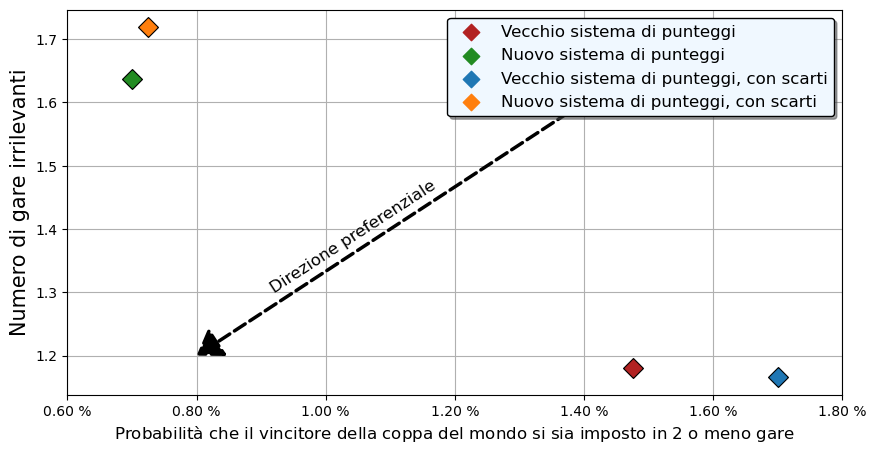

In [33]:
fig, ax = plt.subplots(1, 1, figsize = (10, 5))



ax.scatter(prob2MinOld, meanRacesDecidedOld, label = 'Vecchio sistema di punteggi', s = 70, marker = 'D', color = 'firebrick', zorder = 2)
ax.scatter(prob2MinNew, meanRacesDecidedNew, label = 'Nuovo sistema di punteggi', s = 70, marker = 'D', color = 'forestgreen', zorder = 2)
ax.scatter(prob2MinOldElim, meanRacesDecidedOldElim, label = 'Vecchio sistema di punteggi, con scarti', s = 70, marker = 'D', color = 'C0', zorder = 2)
ax.scatter(prob2MinNewElim, meanRacesDecidedNewElim, label = 'Nuovo sistema di punteggi, con scarti', s = 70, marker = 'D', color = 'C1', zorder = 2)
ax.scatter(prob2MinOld, meanRacesDecidedOld, s = 100, marker = 'D', color = 'black', zorder = 1)
ax.scatter(prob2MinNew, meanRacesDecidedNew, s = 100, marker = 'D', color = 'black', zorder = 1)
ax.scatter(prob2MinOldElim, meanRacesDecidedOldElim, s = 100, marker = 'D', color = 'black', zorder = 1)
ax.scatter(prob2MinNewElim, meanRacesDecidedNewElim, s = 100, marker = 'D', color = 'black', zorder = 1)
ax.set_xlabel('Probabilità che il vincitore della coppa del mondo si sia imposto in $2$ o meno gare', fontsize = 12)
ax.set_ylabel('Numero di gare irrilevanti', fontsize = 15)
ax.grid(zorder = 1)
ax.legend(facecolor = 'aliceblue', edgecolor = 'black', shadow = True, fontsize = 12)
#xaxisLine = np.linspace(prob2MinOld, prob2MinOldElim, 1000)
#ax.arrow(prob2MinOld, meanRacesDecidedNew,prob2MinNew -  prob2MinOld,meanRacesDecidedOld -meanRacesDecidedNew, zorder = 2,\
 #        width = 1e-4, length_includes_head = True, head_width = 5e-4, head_length = 1e-2, color = 'black')
prop = dict(arrowstyle="-|>,head_width=1,head_length=1.5",\
            shrinkA=0,shrinkB=0, linestyle='--', linewidth=2.5, facecolor = 'black')
locs, labels = plt.xticks()
plt.xticks(locs, [f'{i*100:.2f} %' for i in locs])

ax.annotate("", xy=(0.008,1.2), xytext=(0.014,1.6), arrowprops=prop)
ax.text(0.0091, 1.3, 'Direzione preferenziale', fontsize = 12, color = 'black', zorder = 3, rotation = 33)
#ax.xaxis.set_major_formatter(mtick.PercentFormatter())
fig.savefig('resultsMetrics.png', dpi = 300, bbox_inches = 'tight')
plt.show()

In [40]:
tmp = pd.read_csv(allFiles['2014-2015']['men'][0], sep = '\t')#[['Rank', '']]
tmp['fullName'] = tmp['Given Name'] + ' ' + tmp['Family\xa0Name']
dict(zip(tmp['fullName'],tmp['Rank']))

{'Martin Fourcade': 1,
 'Ole Einar Bjoerndalen': 2,
 'Timofei Lapshin': 3,
 'Johannes Thingnes Boe': 4,
 'Benjamin Weger': 5,
 'Andrejs Rastorgujevs': 6,
 'Roland Lessing': 7,
 'Benedikt Doll': 8,
 'Krasimir Anev': 9,
 'Artem Tyshchenko': 10,
 'Yuryi Liadov': 11,
 'Simon Eder': 12,
 'Michal Slesingr': 13,
 'Vladimir Iliev': 14,
 'Klemen Bauer': 15,
 'Jakov Fak': 16,
 'Quentin Fillon Maillet': 16,
 'Vladimir Chepelin': 18,
 'Simon Fourcade': 19,
 'Andreas Birnbacher': 20,
 'Thomas Bormolini': 21,
 'Erlend Bjoentegaard': 22,
 'Dmitry Malyshko': 23,
 'Daniel Mesotitsch': 24,
 'Ondrej Moravec': 25,
 'Erik Lesser': 26,
 'Alexander Os': 27,
 'Serafin Wiestner': 28,
 'Christofer Eriksson': 29,
 'Simon Schempp': 30,
 'Jaroslav Soukup': 31,
 'Michael Roesch': 32,
 'Dominik Windisch': 33,
 'Lowell Bailey': 34,
 'Nathan Smith': 35,
 'Daniel Boehm': 36,
 'Fredrik Lindstroem': 37,
 'Matej Kazar': 38,
 'Miroslav Matiasko': 39,
 'Alexey Volkov': 40,
 'Friedrich Pinter': 41,
 'Tim Burke': 42,
 'Anton 

In [92]:
#season = '2014-2015'
#gender = 'men'
simResults = {season:{'men':{}, 'women':{}} for season in allSeasons}


for season in allSeasons:
    for gender in ['men', 'women']:
        allRaces = allFiles[season][gender]
        
        fileRanking = list(filter(lambda x: season in x, finalRankings[gender]))[0]
        dfRanking = pd.read_csv(fileRanking, sep = '\t')
        dfRanking['fullName'] = dfRanking['Given Name'] + ' ' + dfRanking['Family\xa0Name']
        dfRanking = dfRanking.sort_values(by = 'World Cup\nRank')
        simResults[season][gender] = {name : [] for name in list(dfRanking['fullName'])}
        for i in range(len(allRaces)):
            racesTmp = pd.read_csv(allRaces[i], sep = '\t')
            rankFiltered = list(filter(catch, list(racesTmp['Rank'])))
            lastPlace = np.max(np.array(rankFiltered).astype(int))
            racesTmp['fullName'] = racesTmp['Given Name'] + ' ' + racesTmp['Family\xa0Name']
            dictTmp = dict(zip(racesTmp['fullName'], racesTmp['Rank']))
            
            

            for name in list(dfRanking['fullName']):
                #print(name, dictTmp, simResults)
                if name in list(dictTmp.keys()) and catch(dictTmp[name]):
                    simResults[season][gender][name].append(int(dictTmp[name]))
                else:
                    simResults[season][gender][name].append(lastPlace + 1)



In [95]:
len(allSeasons)

8

In [96]:
alltValues = []
for season in allSeasons:
    for gender in ['men', 'women']:
        df = pd.DataFrame(simResults[season][gender])
        alltValues.append(np.mean((((df - df.mean(axis = 0)) / df.std(axis = 0)) > 1.714).iloc[:,:15].sum(axis = 0)))
np.mean(alltValues)

1.9375

In [78]:
tmp = pd.DataFrame(simResults['2014-2015']['men'])
np.mean((((tmp - tmp.mean(axis = 0)) / tmp.std(axis = 0)) > 1.7).iloc[:,:15].sum(axis = 0))

1.9333333333333333

In [ ]:
1.67675, 0.006
1.1, 0.017
0.017 0.00725
1.166 1.71875

In [ ]:
resultsMetrics['Old'].keys()

dict_keys(['winnerOld', 'winsOld', 'raceDedicedBeforeOld', 'seasonOld'])

In [ ]:
baseMetricsDict = {'winner':[], 'wins':[], 'raceDedicedBefore':[], 'season':[]}

resultsMetrics2 = {'Old':{'winnerOld':[], 'winsOld':[], 'raceDedicedBeforeOld':[], 'seasonOld':[]}, 'New': baseMetricsDict}
resultsMetrics2['Old']['winnerOld'].append(1)
resultsMetrics2

{'Old': {'winnerOld': [1],
  'winsOld': [],
  'raceDedicedBeforeOld': [],
  'seasonOld': []},
 'New': {'winner': [], 'wins': [], 'raceDedicedBefore': [], 'season': []}}

In [ ]:
baseMetricsDictOld = {'winnerOld':[], 'winsOld':[], 'raceDedicedBeforeOld':[], 'seasonOld':[]}
baseMetricsDictNew = {'winnerNew':[], 'winsNew':[], 'raceDedicedBeforeNew':[], 'seasonNew':[]}


resultsMetrics2 = {'Old':baseMetricsDictOld, 'New': baseMetricsDictNew}
numIteration = 250
numRaces = 24
#for _ in tqdm(range(numIteration)):
for i in range(numRaces):
        for season in allSeasons:
            for ranking in ['Old', 'New']:
                
                if ranking == 'Old':
                        dictRanking = dictOld
                        pointsFirst = 60
                else:
                    dictRanking = dictNew
                    pointsFirst = 90
                for gender in ['men', 'women']:
                    
                    fileRanking = list(filter(lambda x: season in x, finalRankings[gender]))[0]
                    dfRanking = pd.read_csv(fileRanking, sep = '\t')
                    dfRanking['fullName'] = dfRanking['Given Name'] + ' ' + dfRanking['Family\xa0Name']
                    

                    if i == range(numRaces)[-1]:
                        
                        dfMetrics = pd.DataFrame(simResults[season][ranking][gender])
                        winner = dfMetrics.sum(axis = 0).sort_values(ascending=False).index[0]
                        wins = (dfMetrics == pointsFirst).sum(axis = 0)[winner]
                        
                        raceIdx = np.where((pd.DataFrame(np.array(dfMetrics.cumsum(axis = 0)) - np.array(dfMetrics.cumsum(axis = 0)[winner])[:,None],\
                columns = dfMetrics.columns) > -np.array((24 - np.array(range(24)))*pointsFirst).reshape(24, 1)).sum(axis = 1)\
                    == 1)[0]
                        if len(raceIdx) == 0:
                            raceDedicedBefore = 0
                        else:
                            raceDedicedBefore = 23 - raceIdx[0]
                        #print(season, winner, ranking, wins)
                        
                        resultsMetrics2[ranking][f'winner{ranking}'].append(winner)
                        resultsMetrics2[ranking][f'wins{ranking}'].append(str(wins))
                        resultsMetrics2[ranking][f'raceDedicedBefore{ranking}'].append(str(raceDedicedBefore))
                        resultsMetrics2[ranking][f'season{ranking}'].append(season)
                        #print(season, winner, ranking, wins)
                        #print(resultsMetrics2['Old']['winner'])
                        #print(resultsMetrics2['New']['winner'])

In [ ]:
with 

In [ ]:
results = json.load(open('resultsMetrics.json'))
winsNumericOld = np.array(results['Old']['wins']).astype(int)
print(np.mean(winsNumericOld))
winsNumericNew = np.array(results['New']['wins']).astype(int)
print(np.mean(winsNumericNew))

9.67825
9.67825


{'winner': ['Martin Fourcade',
  'Kaisa Makarainen',
  'Martin Fourcade',
  'Darya Domracheva',
  'Martin Fourcade',
  'Gabriela Koukalova',
  'Martin Fourcade',
  'Marie Dorin Habert',
  'Martin Fourcade',
  'Laura Dahlmeier',
  'Martin Fourcade',
  'Gabriela Koukalova',
  'Martin Fourcade',
  'Anastasiya Kuzmina',
  'Martin Fourcade',
  'Anastasiya Kuzmina',
  'Johannes Thingnes Boe',
  'Dorothea Wierer',
  'Johannes Thingnes Boe',
  'Dorothea Wierer',
  'Martin Fourcade',
  'Denise Herrmann',
  'Martin Fourcade',
  'Dorothea Wierer',
  'Johannes Thingnes Boe',
  'Tiril Eckhoff',
  'Sturla Holm Laegreid',
  'Tiril Eckhoff',
  'Quentin Fillon Maillet',
  'Marte Olsbu Roeiseland',
  'Quentin Fillon Maillet',
  'Marte Olsbu Roeiseland',
  'Martin Fourcade',
  'Darya Domracheva',
  'Martin Fourcade',
  'Darya Domracheva',
  'Martin Fourcade',
  'Gabriela Koukalova',
  'Martin Fourcade',
  'Marie Dorin Habert',
  'Martin Fourcade',
  'Laura Dahlmeier',
  'Martin Fourcade',
  'Gabriela Kou

In [ ]:
results['Old']['raceDedicedBefore'] == results['New']['raceDedicedBefore']

True

In [ ]:
winner = pd.DataFrame(simResults['2014-2015']['Old']['men']).sum(axis = 0).sort_values(ascending=False).index[0]
wins = (pd.DataFrame(simResults['2014-2015']['Old']['men']) == 60).sum(axis = 0)[winner]
raceIdx = np.where((pd.DataFrame(np.array(pd.DataFrame(simResults['2014-2015']['Old']['men']).cumsum(axis = 0)) -   
             np.array(pd.DataFrame(simResults['2014-2015']['Old']['men']).cumsum(axis = 0)[winner])[:,None],\
                  columns = pd.DataFrame(simResults['2014-2015']['Old']['men']).columns) > -np.array((24 - np.array(range(24)))*60).reshape(24, 1)).sum(axis = 1)\
                    == 3)[0]#[0]
if len(raceIdx) == 0:
    raceDedicedBefore = 0
else:
    raceDedicedBefore = 23 - raceIdx[0]
raceDedicedBefore

0

In [ ]:
23 - np.where((pd.DataFrame(np.array(pd.DataFrame(simResults['2014-2015']['Old']['men']).cumsum(axis = 0)) -   
             np.array(pd.DataFrame(simResults['2014-2015']['Old']['men']).cumsum(axis = 0)[winner])[:,None],\
                  columns = pd.DataFrame(simResults['2014-2015']['Old']['men']).columns) > -np.array((24 - np.array(range(24)))*60).reshape(24, 1)).sum(axis = 1)\
                    == 4)[0][0]

2

## Distribution of the placements

In [ ]:
def catch(x):
    try:
        return int(x[0])
    except:
        return np.nan

In [ ]:
def readPoints(file, name, rankingDict):
    df = pd.read_csv(file, sep = '\t')
    df['fullName'] = df['Given Name'] + ' ' + df['Family\xa0Name']
    
    rank = catch(df[df['fullName'] == name]['Rank'])#.values[0]
    points = rankingDict[rank]
    return points
    

In [ ]:
allFilesMen = {season : allFiles[season]['men'] for season in allSeasons}
season = '2014-2015'
fileRanking = list(filter(lambda x: season in x, finalRankings['men']))[0]
dfRanking = pd.read_csv(fileRanking, sep = '\t')
dfRanking['fullName'] = dfRanking['Given Name'] + ' ' + dfRanking['Family\xa0Name']
dfRanking = dfRanking.sort_values(by = 'World Cup\nRank')
ranking = np.array(dfRanking['World Cup\nRank'])
rankingFiltered = ranking[~np.isnan(ranking)]
rankingFiltered = rankingFiltered.astype(int)
fullName = np.array(dfRanking['fullName'])
fullNameFiltered = fullName[~np.isnan(ranking)]
fullNameFiltered = fullNameFiltered[:20]

tmpList = []
for name in fullNameFiltered:
    arrayPoints =[readPoints(file, name, dictOld) for file in allFilesMen[season]]
    #print(arrayPoints)
    meanPoints = np.nanmean(arrayPoints)
    stdPoints = np.nanstd(arrayPoints)
    zscorePoints = (arrayPoints - meanPoints)/stdPoints
    #print(np.sum(np.array(zscorePoints) > 2) + np.sum(np.array(zscorePoints) < -2))
    tmpList.append(np.sum(np.array(zscorePoints) > 2) + np.sum(np.array(zscorePoints) < -2))


/var/folders/92/pt64shtn3fx70tf0m4ng91240000gn/T/ipykernel_3632/1252609605.py:20: RuntimeWarning: invalid value encountered in divide
  zscorePoints = (arrayPoints - meanPoints)/stdPoints
/var/folders/92/pt64shtn3fx70tf0m4ng91240000gn/T/ipykernel_3632/1252609605.py:20: RuntimeWarning: invalid value encountered in divide
  zscorePoints = (arrayPoints - meanPoints)/stdPoints
/var/folders/92/pt64shtn3fx70tf0m4ng91240000gn/T/ipykernel_3632/1252609605.py:20: RuntimeWarning: invalid value encountered in divide
  zscorePoints = (arrayPoints - meanPoints)/stdPoints
/var/folders/92/pt64shtn3fx70tf0m4ng91240000gn/T/ipykernel_3632/1252609605.py:20: RuntimeWarning: invalid value encountered in divide
  zscorePoints = (arrayPoints - meanPoints)/stdPoints
/var/folders/92/pt64shtn3fx70tf0m4ng91240000gn/T/ipykernel_3632/1252609605.py:20: RuntimeWarning: invalid value encountered in divide
  zscorePoints = (arrayPoints - meanPoints)/stdPoints
/var/folders/92/pt64shtn3fx70tf0m4ng91240000gn/T/ipykernel_3

In [ ]:
tmpList

[0, 2, 4, 3, 3, 0, 0, 0, 2, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0]